In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

working_directory = "/Users/avellaneda/Desktop/Analyse python/"
fname = working_directory + "plot_actin_mito_28h_norm.csv"

data = np.loadtxt(fname, delimiter=";", skiprows=1)
#data_mito = np.loadtxt(fname_C2, delimiter=",", skiprows=1)

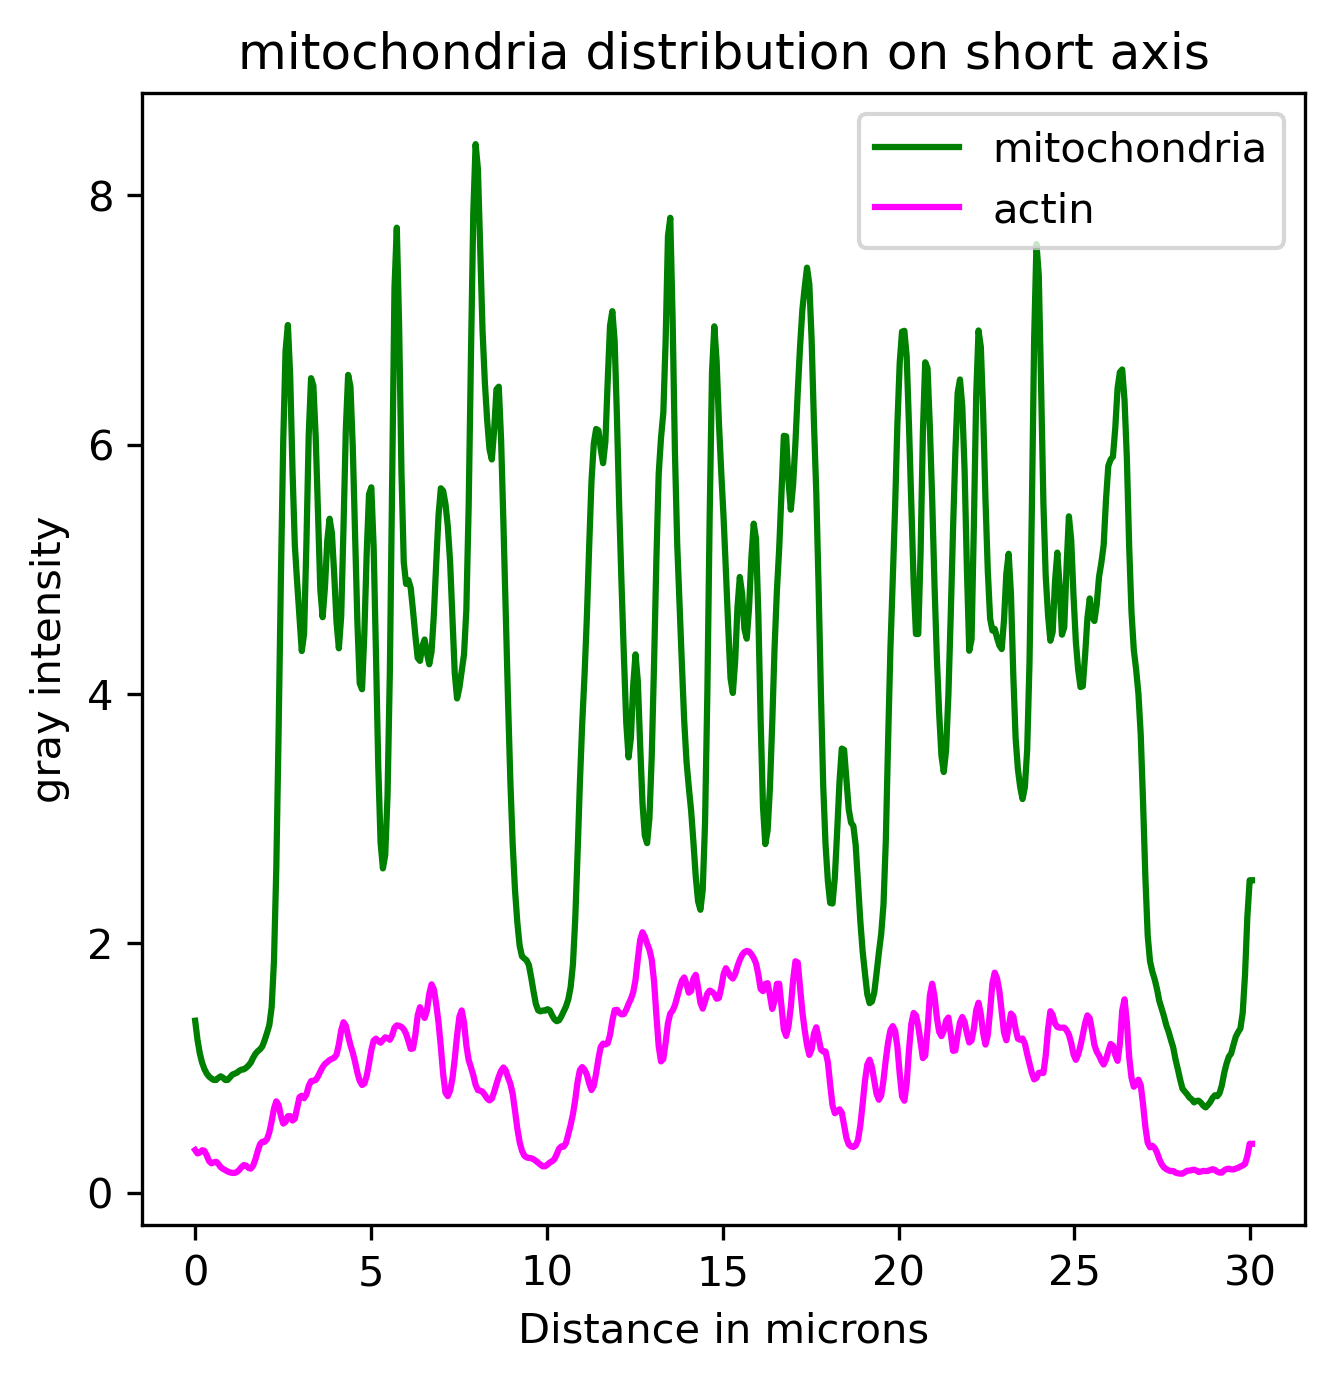

In [24]:
fig = plt.figure(figsize=(5,5),dpi=300) #required to save as .eps
#plt.ylim([])

x = data[:,0]

y_actin = data[:, 1]
y_mito = data[:, 2]
plt.plot(x, y_mito, color = "green", label = "mitochondria")
plt.plot(x, y_actin, color = "magenta", label = "actin")
    #plt.scatter(x, y) # you can comment in if points are needed
plt.xlabel("Distance in microns")
plt.ylabel("gray intensity")
plt.title('mitochondria distribution on short axis')
plt.legend()
plt.plot()

plt.show() # always needs to be at the end, after plt.savefig() otherwise fig is not saved correctly

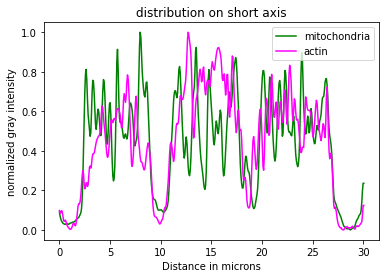

In [25]:
#https://www.statology.org/normalize-data-between-0-and-1/
"""
To normalize the values in a dataset to be between 0 and 1, you can use the following formula:

zi = (xi – min(x)) / (max(x) – min(x))

where:

zi: The ith normalized value in the dataset
xi: The ith value in the dataset
min(x): The minimum value in the dataset
max(x): The maximum value in the dataset
"""


#calculate normalization
y_actin_norm = (y_actin - np.amin(y_actin)) / (np.amax(y_actin) - np.amin(y_actin))
y_mito_norm = (y_mito - np.amin(y_mito)) / (np.amax(y_mito) - np.amin(y_mito))

plt.plot(x, y_mito_norm, color = "green", label = "mitochondria")
plt.plot(x, y_actin_norm, color = "magenta", label = "actin")
    #plt.scatter(x, y) # you can comment in if points are needed
plt.xlabel("Distance in microns")
plt.ylabel("normalized gray intensity")
plt.title('distribution on short axis')
plt.legend()
plt.plot()

#plt.savefig(working_directory + "_plot.eps", format = "eps") #if you want to save the plot to the save location of data uncomment line
plt.show() # always needs to be at the end, after plt.savefig() otherwise fig is not saved correctly

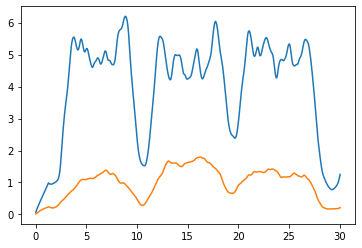

In [26]:
from scipy.signal import lfilter

n = 20             # larger n gives smoother curves
b = [1.0 / n] * n  # numerator coefficients
a = 1              # denominator coefficient
y_lf_mito = lfilter(b, a, y_mito)
y_lf_actin = lfilter(b, a, y_actin)

plt.plot(x, y_lf_mito)
plt.plot(x, y_lf_actin)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


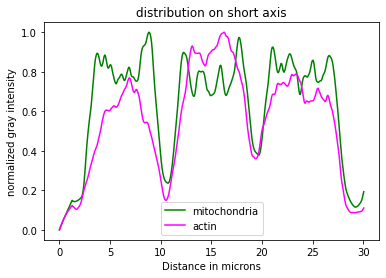

In [27]:
#https://www.statology.org/normalize-data-between-0-and-1/
"""
To normalize the values in a dataset to be between 0 and 1, you can use the following formula:

zi = (xi – min(x)) / (max(x) – min(x))

where:

zi: The ith normalized value in the dataset
xi: The ith value in the dataset
min(x): The minimum value in the dataset
max(x): The maximum value in the dataset
"""


#calculate normalization
y_actin_norm = (y_lf_actin - np.amin(y_lf_actin)) / (np.amax(y_lf_actin) - np.amin(y_lf_actin))
y_mito_norm = (y_lf_mito - np.amin(y_lf_mito)) / (np.amax(y_lf_mito) - np.amin(y_lf_mito))

plt.plot(x, y_mito_norm, color = "green", label = "mitochondria")
plt.plot(x, y_actin_norm, color = "magenta", label = "actin")
    #plt.scatter(x, y) # you can comment in if points are needed
plt.xlabel("Distance in microns")
plt.ylabel("normalized gray intensity")
plt.title('distribution on short axis')
plt.legend()
plt.plot()

plt.savefig(working_directory + "_plot.eps", format = "eps") #if you want to save the plot to the save location of data uncomment line
plt.show() # always needs to be at the end, after plt.savefig() otherwise fig is not saved correctly